In [1]:
run phugoid.py
matplotlib inline

SyntaxError: invalid syntax (<ipython-input-1-f393e529c110>, line 1)

In [2]:
import numpy
from matplotlib import pyplot

In [4]:
T=100.0
dt = 0.02
N=int(T / dt) + 1
t=numpy.linspace(0.0, T, num=N)

In [5]:
print(t)

[0.000e+00 2.000e-02 4.000e-02 ... 9.996e+01 9.998e+01 1.000e+02]


In [6]:
z0=100.0
b0=10.0
zt=100.0
g=9.81
u=numpy.array([z0,b0])
z=numpy.zeros(N)
z[0]=z0

In [7]:
for n in range(1,N):
    rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

In [12]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

# Plot the solution of the elevation.
pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title('Elevation of the phugoid over the time')  # set the title
pyplot.xlabel('Time [s]')  # set the x-axis label
pyplot.ylabel('Elevation [m]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(40.0, 160.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, z, color='C0', linestyle='-', linewidth=2);

In [13]:
import matplotlib.pyplot as plt

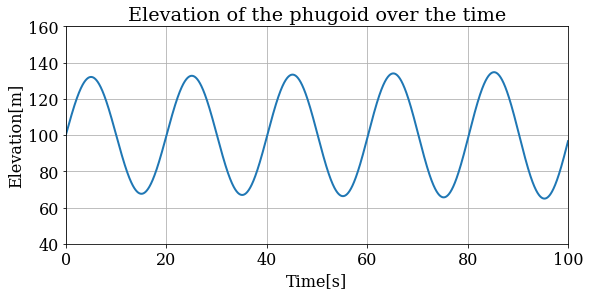

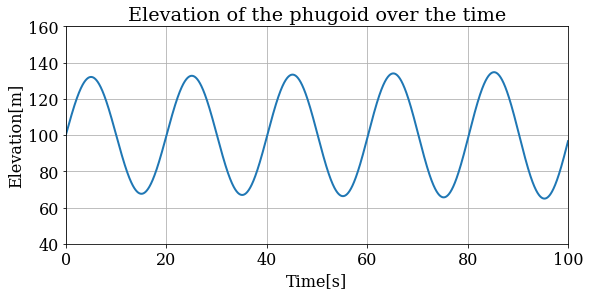

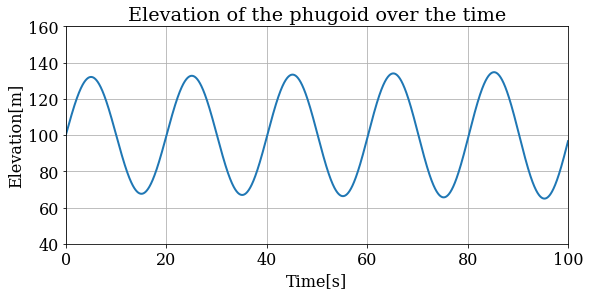

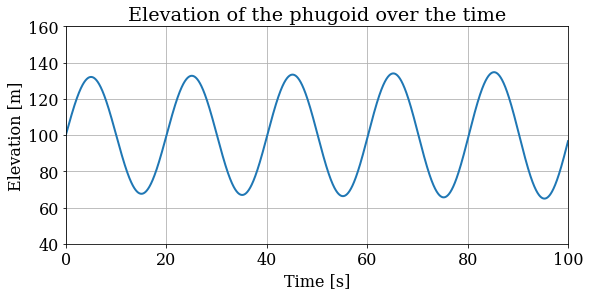

In [14]:
plt.show()

In [15]:
z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
           (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)

In [16]:
pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title('Elevation of the phugoid over the time')  # set the title
pyplot.xlabel('Time [s]')  # set the x-axis label
pyplot.ylabel('Elevation [m]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(40.0, 160.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, z, label='Numerical',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(t, z_exact, label='Analytical',
            color='C1', linestyle='-', linewidth=2)
pyplot.legend();

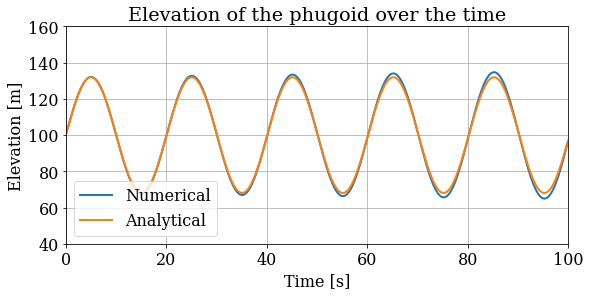

In [17]:
plt.show()

In [18]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

In [19]:
z_values = []

In [20]:
for dt in dt_values:
    N = int(T / dt) + 1
    t = numpy.linspace(0.0, T, num=N)
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]
    z_values.append(z)

In [21]:
def l1_error(z, z_exact, dt):
    error = dt * numpy.sum(numpy.abs(z - z_exact))
    return error

In [22]:
error_values = []
for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  # number of time-steps
    t = numpy.linspace(0.0, T, num=N)  # time grid
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
               (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    error_values.append(l1_error(z, z_exact, dt))

In [23]:
# Plot the error versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Error')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

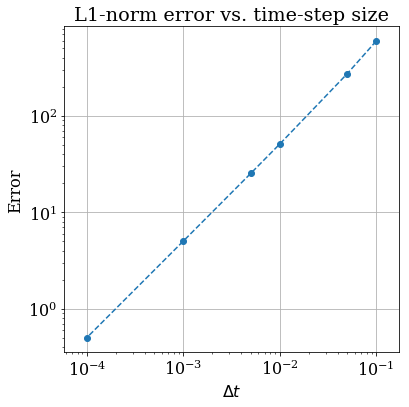

In [24]:
plt.show()